In [130]:
import pandas as pd
import re
from langdetect import detect

# 쉼표가 포함된 CSV 파일 읽기 - 모든 필드를 하나의 컬럼으로 처리
df = pd.read_csv('.data/parasite_reviews.csv')

print(f"전체 리뷰: {len(df)}개")

# 언어 감지 함수
def detect_language(text):
    try:
        return detect(str(text))
    except:
        return None

df['language'] = df['review_text'].apply(detect_language)
df = df[df['language'] == 'en'].copy()

print(f"영어 리뷰: {len(df)}개")
df_review = df[['review_text']].copy()
df_review['review_text'] = df_review['review_text'].str.lower()

print("\n첫 10개 샘플:")
print(df_review.head(10))

전체 리뷰: 1413개
영어 리뷰: 1293개

첫 10개 샘플:
                                          review_text
1   parasite is a masterful achievement that showc...
2   parasite is a remarkable film that really spea...
3   a well-crafted mix of suspenseful drama and da...
4   an unforgettable masterpiece... a cinematic ro...
7   parasite has been widely praised for its craft...
8   i don't know why but i got soo easily attached...
9   absolute dog****. you mean to tell me that thi...
11  parasite is a masterclass in directing and scr...
12  bong joon ho's masterpiece "parasite" deserves...
13  film with a particular and functional atmosphe...


In [131]:
df_review['review_text'] = df_review['review_text'].apply(lambda x: re.sub(r'[^a-z0-9\s]', '', x))
df_review.head(10)

,review_text
1,parasite is a masterful achievement that showc...
2,parasite is a remarkable film that really spea...
3,a wellcrafted mix of suspenseful drama and dar...
4,an unforgettable masterpiece a cinematic rolle...
7,parasite has been widely praised for its craft...
8,i dont know why but i got soo easily attached ...
9,absolute dog you mean to tell me that this stu...
11,parasite is a masterclass in directing and scr...
12,bong joon hos masterpiece parasite deserves ev...
13,film with a particular and functional atmosphe...


In [132]:
print(f"총 리뷰 수: {len(df_review)}")
full_reviews = df_review['review_text'].isna()
print(f'empty_reviews : {full_reviews.sum()}')

총 리뷰 수: 1293
empty_reviews : 0


In [133]:
multiple_spaces = df_review['review_text'].str.contains("  ")
print(f"여러 공백이 있는 리뷰: {multiple_spaces.sum()}개")
if multiple_spaces.sum() > 0:
    print("예시:")
    print(df_review[multiple_spaces]['review_text'].head(10))

여러 공백이 있는 리뷰: 135개
예시:
1     parasite is a masterful achievement that showc...
4     an unforgettable masterpiece a cinematic rolle...
7     parasite has been widely praised for its craft...
12    bong joon hos masterpiece parasite deserves ev...
15    as a huge fan of snowpiercer i had incredibly ...
28    masterpiece a gift for humanity do you want to...
36    it starts out like a fun comedy then the movie...
44    god bless joonho for his unique storytelling i...
52    a must watch movie i am now a korean movie ser...
65    togo is without a doubt a surprise hit in my o...
Name: review_text, dtype: object


In [134]:
df_review['review_text'] = df_review['review_text'].str.replace(r'\s+',' ')
multiple_spaces = df_review['review_text'].str.contains("  ")
print(f"여러 공백이 있는 리뷰: {multiple_spaces.sum()}개")
if multiple_spaces.sum() > 0:
    print("예시:")
    print(df_review[multiple_spaces]['review_text'].head(3))

여러 공백이 있는 리뷰: 135개
예시:
1    parasite is a masterful achievement that showc...
4    an unforgettable masterpiece a cinematic rolle...
7    parasite has been widely praised for its craft...
Name: review_text, dtype: object


In [135]:
leading_spaces = df_review['review_text'].str.match(r'^\s')
print(f"앞 공백: {leading_spaces.sum()}개")
if leading_spaces.sum() > 0:
    print("\n앞 공백이 있는 리뷰:")
    print(df_review[leading_spaces]['review_text'])

앞 공백: 4개

앞 공백이 있는 리뷰:
105      movie lets start first you have the most hate...
381                               between rank and stairs
876      it was just a masterpiecethe director is a le...
1309     playful until it becomes diabolical only then...
Name: review_text, dtype: object


In [136]:
trailing_spaces = df_review['review_text'].str.match(r'\s$')
print(f"뒤 공백: {trailing_spaces.sum()}개")
if trailing_spaces.sum() > 0:
    print("\n뒤 공백이 있는 리뷰:")
    print(df_review[trailing_spaces]['review_text'])

뒤 공백: 0개


In [137]:
both_spaces = leading_spaces | trailing_spaces
print(f"앞뒤 공백 총: {both_spaces.sum()}개")
if both_spaces.sum() > 0:
    print("\n앞 공백이 있는 리뷰:")
    print(df_review[both_spaces]['review_text'])

앞뒤 공백 총: 4개

앞 공백이 있는 리뷰:
105      movie lets start first you have the most hate...
381                               between rank and stairs
876      it was just a masterpiecethe director is a le...
1309     playful until it becomes diabolical only then...
Name: review_text, dtype: object


In [138]:
df_review['review_text'] = df_review['review_text'].str.strip()

In [139]:
both_spaces = df_review['review_text'].str.match(r'^\s|\s$')
print(f"제거 후: {both_spaces.sum()}개")

제거 후: 0개


In [140]:
# min_words = df_review['review_text'].str.split().str.len()
# print(f"단어 1-2개 리뷰: {(min_words < 3).sum()}개")
# df_review = df_review[min_words >= 3]
# print(df_review[min_words <= 3])

In [141]:
# import os
# from pathlib import Path
# from datetime import datetime

# # 현재 작업 디렉토리 확인
# print(f"현재 작업 디렉토리: {os.getcwd()}")

# # 저장 경로를 명시적으로 지정
# output_path = Path(os.getcwd()) / f"preprocessed_reviews_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"

# try:
#     # 데이터프레임 저장
#     df_review.to_csv(output_path, index=False, encoding='utf-8-sig')  # BOM 추가로 Excel 호환성 개선
#     print(f"✅ 전처리 완료 및 저장: {output_path}")
#     print(f"📊 저장된 행 수: {len(df_review)}")
# except Exception as e:
#     print(f"❌ 저장 실패: {e}")
#     # 대안: 홈 디렉토리에 저장
#     home_path = Path.home() / "Documents" / f"preprocessed_reviews_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
#     df_review.to_csv(home_path, index=False, encoding='utf-8-sig')
#     print(f"✅ 대체 경로에 저장: {home_path}")

In [142]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

df = df_review.copy()
df['tokens'] = df['review_text'].apply(word_tokenize)
print(df[['review_text', 'tokens']].head(10))

                                          review_text  \
1   parasite is a masterful achievement that showc...   
2   parasite is a remarkable film that really spea...   
3   a wellcrafted mix of suspenseful drama and dar...   
4   an unforgettable masterpiece a cinematic rolle...   
7   parasite has been widely praised for its craft...   
8   i dont know why but i got soo easily attached ...   
9   absolute dog you mean to tell me that this stu...   
11  parasite is a masterclass in directing and scr...   
12  bong joon hos masterpiece parasite deserves ev...   
13  film with a particular and functional atmosphe...   

                                               tokens  
1   [parasite, is, a, masterful, achievement, that...  
2   [parasite, is, a, remarkable, film, that, real...  
3   [a, wellcrafted, mix, of, suspenseful, drama, ...  
4   [an, unforgettable, masterpiece, a, cinematic,...  
7   [parasite, has, been, widely, praised, for, it...  
8   [i, dont, know, why, but, i, got

In [143]:
import nltk
from nltk.corpus import stopwords
import contractions

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
extra_stop_words = ['movie', 'netflix', 'film', 'movies', 'parasite', 'films',
                    'animated', 'im', 'ive', 'ill', 'id', 'dont',
                     'cant', 'wont', 'youre', 'theyre']
stop_words.update(extra_stop_words)
stop_words_list = list(stop_words)
# print(stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chany\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [144]:
df['filtered_tokens'] = df['tokens'].apply(lambda x: [w for w in x if w not in stop_words])
print(df['filtered_tokens'])

1       [masterful, achievement, showcases, bong, joon...
2       [remarkable, really, speaks, nature, capitalis...
3       [wellcrafted, mix, suspenseful, drama, dark, h...
4       [unforgettable, masterpiece, cinematic, roller...
7       [widely, praised, craftsmanship, good, reason,...
                              ...                        
1408    [bong, joon, hos, cannes, winner, fantasticall...
1409    [wildride, entertainment, thats, turns, funny,...
1410    [seals, serious, case, bong, joonho, one, grea...
1411    [latest, bong, joon, ho, funny, thrilling, poi...
1412    [capital, invades, lifes, private, spaces, ful...
Name: filtered_tokens, Length: 1293, dtype: object


In [145]:
# from nltk.stem import PorterStemmer
# stemmer = PorterStemmer()
# result = []
# for tokens in df['filtered_tokens']:
#     stemmed = [stemmer.stem(token) for token in tokens]
#     result.append(stemmed)
# print(result)

In [146]:
# from nltk.stem import LancasterStemmer
# stemmer = LancasterStemmer()
# result = []
# for tokens in df['filtered_tokens']:
#     stemmed = [stemmer.stem(token) for token in tokens]
#     result.append(stemmed)
# print(result)

In [147]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
result = []
for tokens in df['filtered_tokens']:
    lemma = [lemmatizer.lemmatize(token) for token in tokens]
    result.append(lemma)
print(result)

[['masterful', 'achievement', 'showcase', 'bong', 'joonhos', 'exceptional', 'directing', 'prowess', 'storytelling', 'brilliance', 'deserves', 'every', 'accolade', 'received', 'directing', 'cinematography', 'bong', 'joonhos', 'direction', 'meticulous', 'purposeful', 'every', 'shot', 'serf', 'narrative', 'particularly', 'use', 'vertical', 'space', 'reinforce', 'class', 'division', 'park', 'elevated', 'mansion', 'kims', 'semibasement', 'dwelling', 'camera', 'movement', 'deliberate', 'creating', 'tension', 'simple', 'pan', 'tilt', 'rain', 'sequence', 'cinematographically', 'stunning', 'using', 'weather', 'plot', 'device', 'visual', 'metaphor', 'production', 'design', 'seamlessly', 'integrates', 'cinematography', 'create', 'distinct', 'world', 'feel', 'authentic', 'yet', 'symbolic', 'script', 'storytelling', 'screenplay', 'structural', 'marvel', 'defies', 'genre', 'convention', 'maintaining', 'perfect', 'narrative', 'cohesion', 'begin', 'dark', 'comedy', 'gradually', 'transforms', 'thriller

In [148]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\chany\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [149]:
df['pos_tags'] = df['filtered_tokens'].apply(lambda x: nltk.pos_tag(x))
print("POS 태깅 결과 (상위 10개):")
print(df[['review_text', 'pos_tags']].head(10))

POS 태깅 결과 (상위 10개):
                                          review_text  \
1   parasite is a masterful achievement that showc...   
2   parasite is a remarkable film that really spea...   
3   a wellcrafted mix of suspenseful drama and dar...   
4   an unforgettable masterpiece a cinematic rolle...   
7   parasite has been widely praised for its craft...   
8   i dont know why but i got soo easily attached ...   
9   absolute dog you mean to tell me that this stu...   
11  parasite is a masterclass in directing and scr...   
12  bong joon hos masterpiece parasite deserves ev...   
13  film with a particular and functional atmosphe...   

                                             pos_tags  
1   [(masterful, JJ), (achievement, NN), (showcase...  
2   [(remarkable, JJ), (really, RB), (speaks, JJ),...  
3   [(wellcrafted, VBN), (mix, NN), (suspenseful, ...  
4   [(unforgettable, JJ), (masterpiece, NN), (cine...  
7   [(widely, RB), (praised, VBN), (craftsmanship,...  
8   [(know, NNS)

In [150]:
import pandas as pd
from datetime import datetime

# --- 전처리 데이터 CSV 저장 (간단 버전) ---

df_complete = df[['review_text', 'filtered_tokens', 'pos_tags']].copy()

# 각 컬럼을 문자열로 변환
df_complete['filtered_tokens_str'] = df_complete['filtered_tokens'].apply(lambda x: ' '.join(x))
df_complete['pos_tags_str'] = df_complete['pos_tags'].apply(
    lambda tags: ' '.join([f"{token}/{tag}" for token, tag in tags])
)

# 최종 저장 (리스트 컬럼 제외, 3개 컬럼만)
df_final_complete = df_complete[[
    'review_text', 
    'filtered_tokens_str', 
    'pos_tags_str'
]]

# CSV 파일로 저장
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
output_file = f'preprocessed_parasite_complete_{timestamp}.csv'

df_final_complete.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"✅ 전처리 완료 및 저장: {output_file}")
print(f"📊 저장된 행 수: {len(df_final_complete)}")
print(f"\n📋 저장된 컬럼:")
for i, col in enumerate(df_final_complete.columns, 1):
    print(f"  {i}. {col}")

print(f"\n📄 첫 3개 샘플:")
print(df_final_complete.head(3))

✅ 전처리 완료 및 저장: preprocessed_parasite_complete_20251019_225921.csv
📊 저장된 행 수: 1293

📋 저장된 컬럼:
  1. review_text
  2. filtered_tokens_str
  3. pos_tags_str

📄 첫 3개 샘플:
                                         review_text  \
1  parasite is a masterful achievement that showc...   
2  parasite is a remarkable film that really spea...   
3  a wellcrafted mix of suspenseful drama and dar...   

                                 filtered_tokens_str  \
1  masterful achievement showcases bong joonhos e...   
2  remarkable really speaks nature capitalism eve...   
3  wellcrafted mix suspenseful drama dark humour ...   

                                        pos_tags_str  
1  masterful/JJ achievement/NN showcases/NNS bong...  
2  remarkable/JJ really/RB speaks/JJ nature/NN ca...  
3  wellcrafted/VBN mix/NN suspenseful/JJ drama/NN...  


In [151]:
my_tag_set = ['NN','NNS', 'NNP']
filtered_tokens = [token for tags in df['pos_tags'] for token, tag in tags if tag in my_tag_set]

word_cnt_filtered = dict()
for word in filtered_tokens:
    word_cnt_filtered[word] = word_cnt_filtered.get(word, 0) + 1

sorted_word_cnt_filtered = sorted(word_cnt_filtered, key=word_cnt_filtered.get, reverse=True)
print(sorted_word_cnt_filtered[:20])

['family', 'story', 'class', 'way', 'time', 'people', 'plot', 'characters', 'watch', 'masterpiece', 'comedy', 'cinematography', 'joonho', 'year', 'something', 'picture', 'director', 'work', 'thriller', 'life']


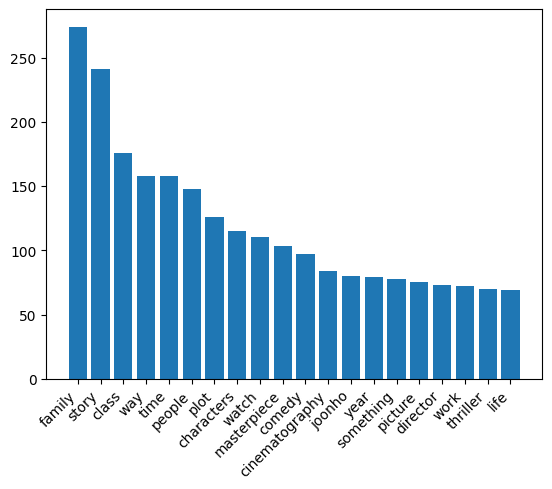

In [152]:
from wordcloud import WordCloud
import matplotlib.pylab as plt
key = sorted_word_cnt_filtered[:20]
cnt = [word_cnt_filtered[k] for k in key]

plt.bar(range(len(key)), cnt, tick_label=key)
plt.xticks(rotation=45, ha='right')
plt.show()

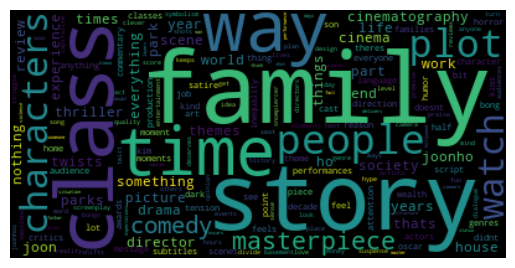

In [153]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate_from_frequencies(word_cnt_filtered)
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

영어 리뷰: 1295개


c:\dataintelligence\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



--- 최종 정제된 토큰 상위 키워드 비교 (단어만 출력) ---

[CountVectorizer 상위 단어 리스트]
['family', 'story', 'class', 'time', 'way', 'people', 'character', 'plot', 'year', 'watch', 'life', 'park', 'masterpiece', 'comedy', 'work', 'director', 'cinematography', 'joonho', 'scene', 'picture']

[TfidfVectorizer 상위 단어 리스트]
['story', 'time', 'class', 'masterpiece', 'family', 'way', 'plot', 'year', 'watch', 'people', 'comedy', 'review', 'character', 'picture', 'life', 'director', 'work', 'joonho', 'oscar', 'thriller']


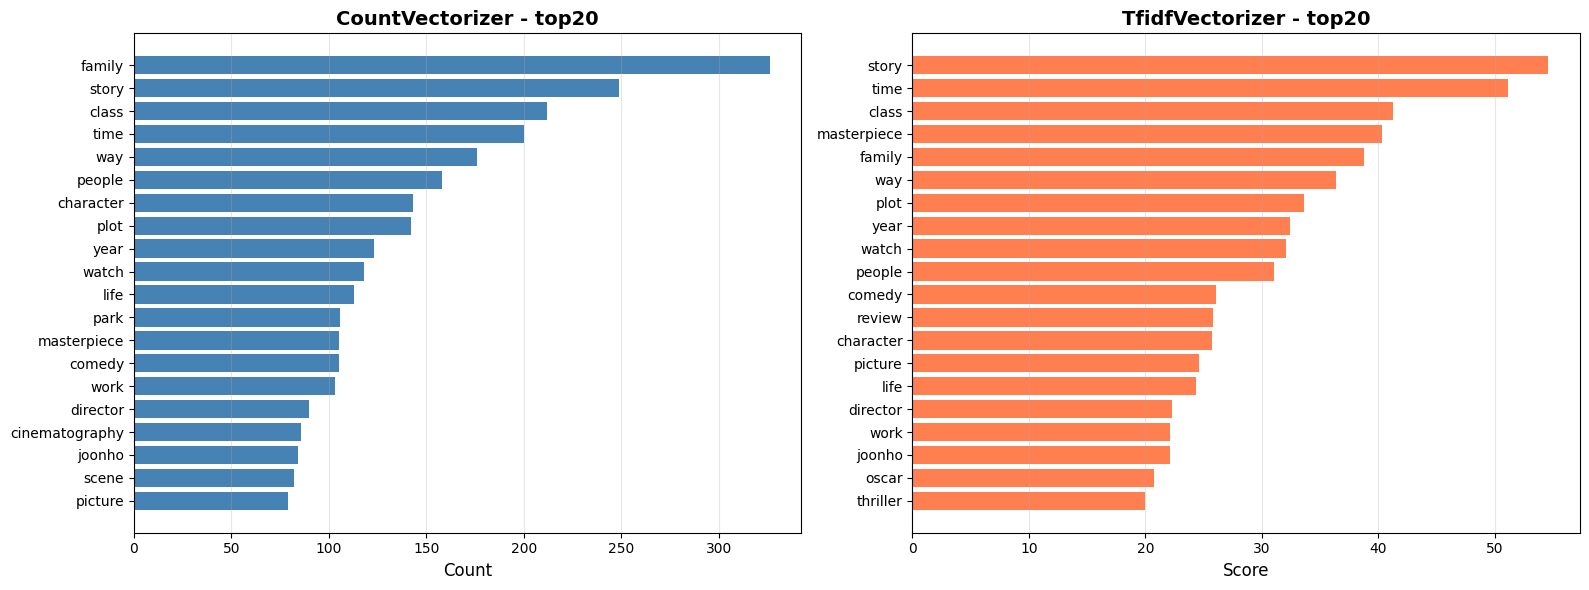

In [154]:
import pandas as pd
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from langdetect import detect

# CSV 파일 읽기
df = pd.read_csv('.data/parasite_reviews.csv')

# 언어 감지 함수
def detect_language(text):
    try:
        return detect(str(text))
    except:
        return None

# 영어 리뷰만 필터링
df['language'] = df['review_text'].apply(detect_language)
df_review = df[df['language'] == 'en'].copy()
print(f"영어 리뷰: {len(df_review)}개")

# Stopwords 설정
stop_words = set(stopwords.words('english'))
extra_stop_words = ['movie', 'netflix', 'film', 'movies', 'parasite', 'films',
                    'animated', 'im', 'ive', 'ill', 'id', 'dont',
                     'cant', 'wont', 'youre', 'theyre']
stop_words.update(extra_stop_words)

# 전처리 함수
lemmatizer = WordNetLemmatizer()
my_tag_set = {'NN', 'NNS', 'NNP'}

def preprocess_text(text):
    # 1. 소문자 변환 및 특수문자 제거 (영문자, 숫자, 공백만 유지)
    text = re.sub(r'[^a-z0-9\s]', '', text.lower())

    # 2. 토큰화
    tokens = word_tokenize(text)

    # 3. Stopwords 제거 및 길이 필터링
    filtered_tokens = [token for token in tokens if token not in stop_words and len(token) > 1]

    # 4. Lemmatization (표제어 추출)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # 5. POS Tagging & 필터링
    pos_tags = pos_tag(lemmatized_tokens)
    final_tokens = [token for token, tag in pos_tags if tag in my_tag_set]

    return final_tokens

df_review['final_tokens'] = df_review['review_text'].apply(preprocess_text)


vectorizer_config = {
    'tokenizer': lambda x: x,
    'lowercase': False,
    'max_features': 500
}

# CountVectorizer 실행
cv = CountVectorizer(**vectorizer_config)
cv_matrix = cv.fit_transform(df_review['final_tokens'])
cv_top_features = cv.get_feature_names_out()

# TfidfVectorizer 실행
tfidf = TfidfVectorizer(**vectorizer_config)
tfidf_matrix = tfidf.fit_transform(df_review['final_tokens'])
tfidf_top_features = tfidf.get_feature_names_out()


# --- 각 행렬의 단어별 총합을 계산하여 중요도 순으로 정렬하는 함수 ---
def get_top_n_features(feature_names, matrix, n=20):
    # 각 단어(feature)의 점수를 모두 더합니다.
    sum_features = matrix.sum(axis=0)

    # 단어 이름과 점수를 짝지어 DataFrame으로 만듭니다.
    features_df = pd.DataFrame(sum_features, columns=feature_names).T
    features_df.columns = ['score']

    # 점수가 높은 순으로 정렬하여 상위 n개를 반환합니다.
    return features_df.sort_values(by='score', ascending=False).head(n)

# --- 5. 결과 출력 (단어 리스트만) ---
print("\n--- 최종 정제된 토큰 상위 키워드 비교 (단어만 출력) ---")

# CountVectorizer 결과 (단순 빈도 합계 기준)
cv_top_keywords = get_top_n_features(cv_top_features, cv_matrix)
print("\n[CountVectorizer 상위 단어 리스트]")
print(cv_top_keywords.index.tolist()) # .index.tolist() 추가!


# TfidfVectorizer 결과 (TF-IDF 점수 합계 기준)
tfidf_top_keywords = get_top_n_features(tfidf_top_features, tfidf_matrix)
print("\n[TfidfVectorizer 상위 단어 리스트]")
print(tfidf_top_keywords.index.tolist()) # .index.tolist() 추가!

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# CountVectorizer 막대 그래프
cv_words = cv_top_keywords.index.tolist()
cv_scores = cv_top_keywords['score'].tolist()

ax1.barh(cv_words[::-1], cv_scores[::-1], color='steelblue')
ax1.set_xlabel('Count', fontsize=12)
ax1.set_title('CountVectorizer - top20', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# TfidfVectorizer 막대 그래프
tfidf_words = tfidf_top_keywords.index.tolist()
tfidf_scores = tfidf_top_keywords['score'].tolist()

ax2.barh(tfidf_words[::-1], tfidf_scores[::-1], color='coral')
ax2.set_xlabel('Score', fontsize=12)
ax2.set_title('TfidfVectorizer - top20', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [155]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from langdetect import detect
import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

id2word = corpora.Dictionary(df_review['final_tokens'])

corpus = [id2word.doc2bow(tokens) for tokens in df_review['final_tokens']]

# LDA 모델 생성
lda_model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=5,
    random_state=100, # 결과 재현성을 위한 설정
    update_every=1,
    chunksize=100,
    passes=10, # 전체 코퍼스를 몇 번 반복 학습할지 결정
    alpha='auto',
    per_word_topics=True
)

print("LDA 모델 학습이 완료되었습니다.")


# --- 4. 결과 확인 및 시각화 ---

# 4-1. 텍스트로 토픽 확인
print("\n--- 각 토픽별 주요 단어 ---")
topics = lda_model.print_topics(num_words=10) # 각 토픽별로 10개 단어 출력
for topic in topics:
    print(topic)

# 4-2. pyLDAvis를 사용한 인터랙티브 시각화
print("\nLDA 시각화 데이터를 생성하고 'lda_visualization.html' 파일로 저장합니다.")
pyLDAvis.enable_notebook()
vis_data = gensimvis.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis_data

LDA 모델 학습이 완료되었습니다.

--- 각 토픽별 주요 단어 ---
(0, '0.046*"review" + 0.026*"picture" + 0.017*"piece" + 0.016*"bit" + 0.013*"part" + 0.011*"doesnt" + 0.011*"history" + 0.010*"joonhos" + 0.010*"offer" + 0.009*"get"')
(1, '0.049*"story" + 0.035*"way" + 0.031*"time" + 0.024*"year" + 0.024*"comedy" + 0.018*"watch" + 0.018*"thriller" + 0.017*"thing" + 0.017*"character" + 0.016*"work"')
(2, '0.024*"oscar" + 0.015*"anything" + 0.015*"star" + 0.013*"hype" + 0.012*"act" + 0.011*"picture" + 0.011*"mean" + 0.010*"create" + 0.009*"plot" + 0.009*"others"')
(3, '0.077*"family" + 0.023*"park" + 0.015*"people" + 0.014*"house" + 0.013*"life" + 0.012*"job" + 0.010*"day" + 0.009*"son" + 0.009*"home" + 0.009*"suspense"')
(4, '0.033*"class" + 0.019*"director" + 0.019*"masterpiece" + 0.019*"joonho" + 0.018*"people" + 0.016*"ho" + 0.014*"joon" + 0.012*"society" + 0.012*"audience" + 0.011*"world"')

LDA 시각화 데이터를 생성하고 'lda_visualization.html' 파일로 저장합니다.


c:\dataintelligence\.venv\Lib\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.246389 -0.128776       1        1  31.590802
1      0.185081  0.217697       2        1  26.533658
3     -0.069641 -0.248194       3        1  22.135285
0     -0.244115 -0.015143       4        1  10.459167
2     -0.117715  0.174416       5        1   9.281088, topic_info=          Term        Freq       Total Category  logprob  loglift
91      family  244.000000  244.000000  Default  30.0000  30.0000
69       story  189.000000  189.000000  Default  29.0000  29.0000
582     review   69.000000   69.000000  Default  28.0000  28.0000
71         way  139.000000  139.000000  Default  27.0000  27.0000
13      comedy   92.000000   92.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
473    opinion    8.347131   11.025468   Topic5  -5.0682   2.0989
155    picture   14.410579   54.025471   Topic5  -4.5222   1.0557
45        plot   12.003081   91.696874   Topic5  -4.7050   0.3439
8    character    9.715339  104.848953   Topic5  -4.9164  -0.0016
191        fan    6.545326   11.872726   Topic5  -5.3114   1.7817

[231 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
667       5  0.961775       act
78        1  0.980422     actor
903       4  0.951275  analysis
289       1  0.978335    anyone
616       5  0.977079  anything
...     ...       ...       ...
327       1  0.029879      year
327       2  0.926253      year
327       4  0.019919      year
327       5  0.019919      year
1318      5  0.883606       yes

[242 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 4, 1, 3])